### <center> Dataset Options For the Particle Filter ###

#1 The JHU time series for COVID-19 reported and suspected infections. 

Downside is the lack of testing capacity in the early days of the pandemic may make data unreliable. An option is estimating a parameter for the proportion of the cases that are reported and scale accordingly. This dataset describes cumulative number numbers over time. 

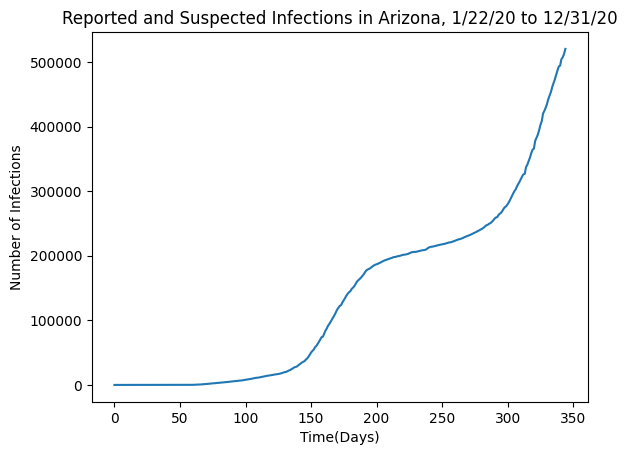

In [66]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

UID_ISO_FIPS_lookup = pd.read_csv('https://github.com/CSSEGISandData/COVID-19/blob/master/csse_covid_19_data/UID_ISO_FIPS_LookUp_Table.csv?raw=true')
# US_data = UID_ISO_FIPS_lookup.loc[UID_ISO_FIPS_lookup['Country_Region'] == 'US']
# print(US_data['Province_State'].unique())

JHU_confirmed_infections = pd.read_csv('https://github.com/CSSEGISandData/COVID-19/blob/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_US.csv?raw=true')
state = 'Arizona'

AZ_Data = JHU_confirmed_infections.loc[JHU_confirmed_infections['Province_State'] == state]
UID = AZ_Data.loc[:,'Admin2']
AZ_Data = AZ_Data.loc[:, '1/22/20':'12/31/20'] 
AZ_Data.insert(0,'County',UID); 

AZ_Data = AZ_Data.set_index('County')
state_total = AZ_Data.sum(skipna=True,numeric_only=True)


plt.title("Reported and Suspected Infections in Arizona, 1/22/20 to 12/31/20")
plt.xlabel("Time(Days)")
plt.ylabel("Number of Infections")
t = np.arange(0,345)
plt.plot(t,state_total)
plt.show()




#2 The JHU time series for confirmed deaths in the US

This dataset is potentially more accurate, as it isn't limited by testing capacity. Deaths due to COVID were easier to identify from the outset of the pandemic. The downside here is that the estimation process may be hampered by the observations being less coupled with the infection rate itself. May have to test to see if this is a real issue. 

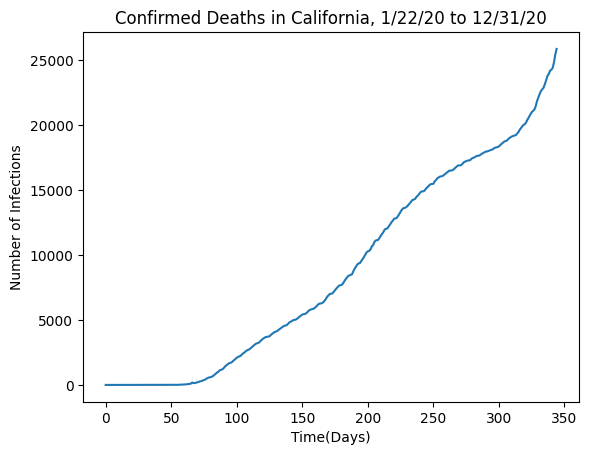

In [72]:
JHU_confirmed_deaths = pd.read_csv('https://github.com/CSSEGISandData/COVID-19/blob/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_US.csv?raw=true')

state = 'California'

AZ_Data = JHU_confirmed_deaths.loc[JHU_confirmed_deaths['Province_State'] == state]
UID = AZ_Data.loc[:,'Admin2']
AZ_Data = AZ_Data.loc[:, '1/22/20':'12/31/20'] 
AZ_Data.insert(0,'County',UID); 

AZ_Data = AZ_Data.set_index('County')
state_total = AZ_Data.sum(skipna=True,numeric_only=True)


plt.title(f"Confirmed Deaths in {state}, 1/22/20 to 12/31/20")
plt.xlabel("Time(Days)")
plt.ylabel("Number of Infections")
t = np.arange(0,345)
plt.plot(t,state_total)
plt.show()






#3 The COVID-19 time series data from the CDC

This is the same dataset we use for FluSight. There are numerous columns, a few of interest are "previous_day_admission_adult_covid_confirmed" , "total_adult_patients_hospitalized_confirmed_covid", and previous_day_admission_pediatric_covid_confirmed. 
The edge transition for I->H, and H, respectively. A downside is that the data reporting is only consistent after May 2020 in both columns.  As pediatric dataset is quite small, it is very sensitive to stochastic noise. 

141


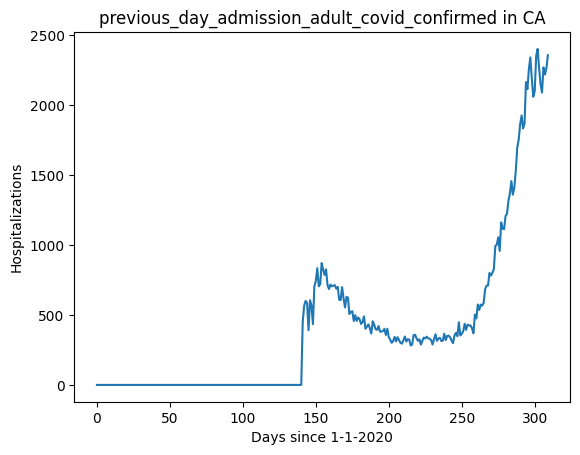

In [71]:

import datetime
import matplotlib.pyplot as plt
df = pd.read_csv("../data_sets/COVID-19_Reported_Patient_Impact_and_Hospital_Capacity_by_State_Timeseries__RAW_.csv")
df = df.sort_values(by='date')

state = "CA"
column = "previous_day_admission_adult_covid_confirmed"

AZ_DATA = [];
AZ_DATA_2223 = [];
for i in range(63779):
  if(df.iloc[i]['state'] == state):
    AZ_DATA.append(df.iloc[i]);
for i in range(len(AZ_DATA)):
  d = (datetime.datetime.strptime(AZ_DATA[i]['date'],'%Y/%m/%d'));
  if(d > datetime.datetime(2020,1,1) and d < datetime.datetime(2020,12,31)):
    AZ_DATA_2223.append(AZ_DATA[i]);
hosp = [];
first_day_of_data = 0
for i in range(len(AZ_DATA_2223)):
  if(pd.isna(AZ_DATA_2223[i][column])):
    hosp.append(0);
  else: 
    hosp.append(int(AZ_DATA_2223[i][column]));
    if(first_day_of_data == 0): 
      first_day_of_data = i; 
print(first_day_of_data)
plt.ylabel("Hospitalizations")
plt.xlabel("Days since 1-1-2020")
plt.title(column + " in "+ state)
plt.plot(hosp);
plt.show()

#4 COVID-19 Reported Patient Impact and Hospital Capacity by Facility

This data set comes from HHS and reports similar data to the state level data but at the facility level. We can extract city level data by summing rows in the same collection week. The dataset only starts in August of 2020, and the weekly timescale may make estimation more difficult.  

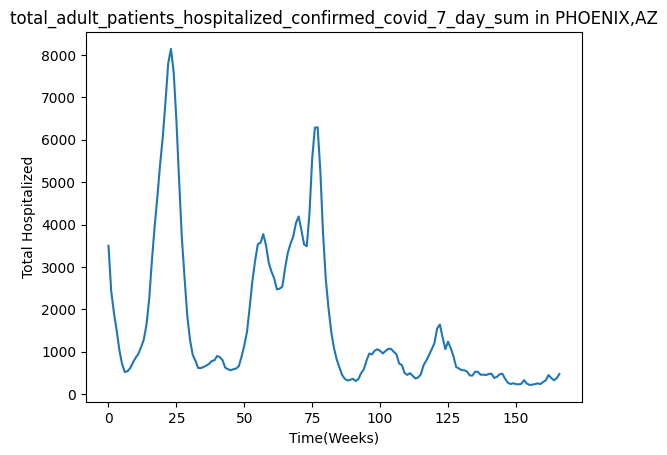

In [73]:

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
HHS_Facility_Data = pd.read_csv('../data_sets/COVID-19_Reported_Patient_Impact_and_Hospital_Capacity_by_Facility_--_RAW_20231023.csv')
state = 'AZ'
city = 'PHOENIX'
column = 'total_adult_patients_hospitalized_confirmed_covid_7_day_sum'

data = HHS_Facility_Data.loc[HHS_Facility_Data['state'] == state]
data = data.loc[data['city'] == city]
data[column] = data[column].where(data[column] >= 0, 0)
extract_raw = data[['collection_week',column]]
plot_data = extract_raw.groupby('collection_week').sum()

t = np.arange(0,167)
plt.xlabel("Time(Weeks)")
plt.ylabel("Total Hospitalized")
plt.title(f"{column} in {city},{state}")
plt.plot(t,plot_data[column])
plt.show()
